In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [2]:
df=pd.read_csv('electricity/3.csv')
df.head()

,timestamp,W,VAR,VA,f,V,PF,A
0,1370563200,0.111,2.483,2.486,50.07,235.07,0.045,0.011
1,1370563201,0.200,2.547,2.555,50.08,235.02,0.078,0.011
2,1370563202,0.152,2.480,2.485,50.08,234.98,0.061,0.011
3,1370563203,0.159,2.444,2.449,50.06,235.00,0.065,0.010
4,1370563204,0.215,2.510,2.519,50.06,234.95,0.085,0.011


In [3]:
df['TIMESTAMP']=pd.to_datetime(df['timestamp'], unit='s')
df['timestamp']=df['TIMESTAMP']
df.drop('TIMESTAMP',axis=1,inplace=True)

In [4]:
df.drop(['A','PF','f','VA','VAR'],axis=1,inplace=True)

In [5]:
df.drop('V',axis=1,inplace=True)

In [6]:
df

,timestamp,W
0,2013-06-07 00:00:00,0.111
1,2013-06-07 00:00:01,0.200
2,2013-06-07 00:00:02,0.152
3,2013-06-07 00:00:03,0.159
4,2013-06-07 00:00:04,0.215
...,...,...
4538839,2013-08-05 16:32:00,77.623
4538840,2013-08-05 16:32:01,77.604
4538841,2013-08-05 16:32:02,77.446
4538842,2013-08-05 16:32:03,77.414


In [7]:
df['W']=pd.to_numeric(df['W'], errors='coerce')

In [8]:
from datetime import date, timedelta

In [9]:
start = pd.to_datetime(date(2013,6,7))
end = pd.to_datetime(date(2013,6,8))

0       2013-06-07 00:00:00
1       2013-06-07 00:00:01
2       2013-06-07 00:00:02
3       2013-06-07 00:00:03
4       2013-06-07 00:00:04
                ...        
78905   2013-06-07 23:59:55
78906   2013-06-07 23:59:56
78907   2013-06-07 23:59:57
78908   2013-06-07 23:59:58
78909   2013-06-07 23:59:59
Name: timestamp, Length: 78910, dtype: datetime64[ns]


<ipython-input-10-5153c13adf33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['timestamp']).dt.time
<ipython-input-10-5153c13adf33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

      timestamp      W
0      00:00:00  0.111
1      00:00:01  0.200
2      00:00:02  0.152
3      00:00:03  0.159
4      00:00:04  0.215
...         ...    ...
78905  23:59:55  0.217
78906  23:59:56  0.178
78907  23:59:57  0.110
78908  23:59:58  0.173
78909  23:59:59  0.132

[78910 rows x 2 columns]


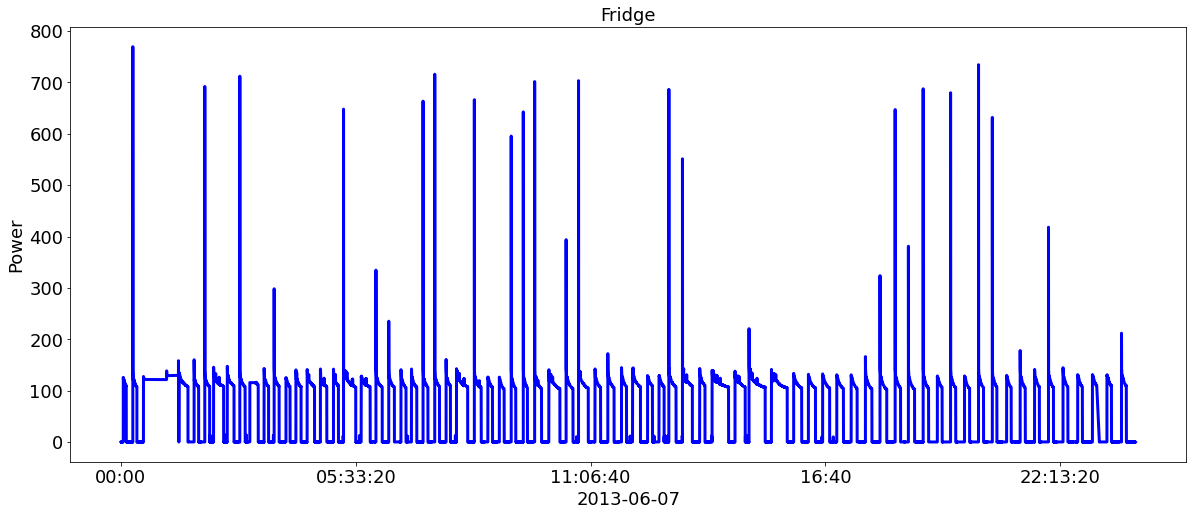

In [10]:
    df_1 = df[(df['timestamp'] >=start) & (df['timestamp'] < end)]
    print( df_1['timestamp'])
    df_1['Time']= pd.to_datetime(df_1['timestamp']).dt.time
    df_1['timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('2013-06-07',fontsize=18)
    plt.title('Fridge',fontsize=18)
    plt.show()

In [95]:
df1=pd.read_csv('electricity/4.csv')
df1.head()

,timestamp,W,VAR,VA,f,V,PF,A
0,1370617491,1715.798,358.751,1752.902,49.97,174.12,0.979,10.067
1,1370617492,1715.752,351.849,1751.458,49.96,174.01,0.980,10.065
2,1370617493,1717.012,358.974,1754.136,49.96,174.26,0.979,10.066
3,1370617494,1717.101,351.439,1752.696,49.97,174.27,0.980,10.057
4,1370617497,377.866,161.843,411.067,49.96,216.10,0.919,1.902


In [96]:
df1['TIMESTAMP']=pd.to_datetime(df1['timestamp'], unit='s')
df1['timestamp']=df1['TIMESTAMP']
df1.drop('TIMESTAMP',axis=1,inplace=True)
df1.drop(['A','PF','f','VA','VAR','V'],axis=1,inplace=True)
df1

,timestamp,W
0,2013-06-07 15:04:51,1715.798
1,2013-06-07 15:04:52,1715.752
2,2013-06-07 15:04:53,1717.012
3,2013-06-07 15:04:54,1717.101
4,2013-06-07 15:04:57,377.866
...,...,...
640245,2013-09-18 03:10:51,1.267
640246,2013-09-18 03:10:52,1.329
640247,2013-09-18 03:10:53,1.306
640248,2013-09-18 03:10:54,1.276


In [142]:
df2=pd.read_csv('electricity/4.csv')
df2.head()

,timestamp,W,VAR,VA,f,V,PF,A
0,1370617491,1715.798,358.751,1752.902,49.97,174.12,0.979,10.067
1,1370617492,1715.752,351.849,1751.458,49.96,174.01,0.980,10.065
2,1370617493,1717.012,358.974,1754.136,49.96,174.26,0.979,10.066
3,1370617494,1717.101,351.439,1752.696,49.97,174.27,0.980,10.057
4,1370617497,377.866,161.843,411.067,49.96,216.10,0.919,1.902


In [143]:
df2['TIMESTAMP']=pd.to_datetime(df2['timestamp'], unit='s')
df2['timestamp']=df2['TIMESTAMP']
df2.drop('TIMESTAMP',axis=1,inplace=True)
df2.drop(['A','PF','f','VA','VAR','V'],axis=1,inplace=True)
df2

,timestamp,W
0,2013-06-07 15:04:51,1715.798
1,2013-06-07 15:04:52,1715.752
2,2013-06-07 15:04:53,1717.012
3,2013-06-07 15:04:54,1717.101
4,2013-06-07 15:04:57,377.866
...,...,...
640245,2013-09-18 03:10:51,1.267
640246,2013-09-18 03:10:52,1.329
640247,2013-09-18 03:10:53,1.306
640248,2013-09-18 03:10:54,1.276


In [144]:
df3=pd.read_csv('electricity/5.csv')
df3.head()

,timestamp,W,VAR,VA,f,V,PF,A
0,1370617518,1630.671,215.800,1644.888,50.04,185.63,0.991,8.861
1,1370617519,1631.803,224.210,1647.135,50.04,185.62,0.991,8.874
2,1370617520,1630.215,216.866,1644.577,50.04,185.75,0.991,8.854
3,1370617521,1630.414,218.258,1644.958,50.04,185.77,0.991,8.855
4,1370617522,1631.702,221.269,1646.636,50.03,185.77,0.991,8.864


In [145]:
df3['TIMESTAMP']=pd.to_datetime(df3['timestamp'], unit='s')
df3['timestamp']=df3['TIMESTAMP']
df3.drop('TIMESTAMP',axis=1,inplace=True)
df3.drop(['A','PF','f','VA','VAR','V'],axis=1,inplace=True)
df3

,timestamp,W
0,2013-06-07 15:05:18,1630.671
1,2013-06-07 15:05:19,1631.803
2,2013-06-07 15:05:20,1630.215
3,2013-06-07 15:05:21,1630.414
4,2013-06-07 15:05:22,1631.702
...,...,...
516699,2013-09-13 13:10:40,1.738
516700,2013-09-13 13:10:41,1.823
516701,2013-09-13 13:10:42,1.742
516702,2013-09-13 13:10:43,1.817


In [146]:
df_2 = pd.concat([df2,df3],axis=1)

In [147]:
df_2

,timestamp,W,timestamp,W
0,2013-06-07 15:04:51,1715.798,2013-06-07 15:05:18,1630.671
1,2013-06-07 15:04:52,1715.752,2013-06-07 15:05:19,1631.803
2,2013-06-07 15:04:53,1717.012,2013-06-07 15:05:20,1630.215
3,2013-06-07 15:04:54,1717.101,2013-06-07 15:05:21,1630.414
4,2013-06-07 15:04:57,377.866,2013-06-07 15:05:22,1631.702
...,...,...,...,...
640245,2013-09-18 03:10:51,1.267,NaT,NaN
640246,2013-09-18 03:10:52,1.329,NaT,NaN
640247,2013-09-18 03:10:53,1.306,NaT,NaN
640248,2013-09-18 03:10:54,1.276,NaT,NaN


In [156]:
df_new = df2.merge(df3, on='timestamp', how='outer')

In [157]:
df_new = df_new.fillna(0)

In [158]:
df_new['W']=df_new['W_x']+df_new['W_y']

In [159]:
df_new.drop(['W_x','W_y'],axis=1,inplace=True)

In [160]:
df_new

,timestamp,W
0,2013-06-07 15:04:51,1715.798
1,2013-06-07 15:04:52,1715.752
2,2013-06-07 15:04:53,1717.012
3,2013-06-07 15:04:54,1717.101
4,2013-06-07 15:04:57,377.866
...,...,...
927382,2013-09-12 14:40:05,0.557
927383,2013-09-12 14:40:21,0.681
927384,2013-09-12 14:40:37,0.624
927385,2013-09-12 15:04:08,0.597


0        2013-06-07 15:04:51
1        2013-06-07 15:04:52
2        2013-06-07 15:04:53
3        2013-06-07 15:04:54
4        2013-06-07 15:04:57
                 ...        
640446   2013-06-07 19:38:35
640447   2013-06-07 19:38:57
640448   2013-06-07 19:38:58
640449   2013-06-07 19:39:22
640450   2013-06-07 19:42:21
Name: timestamp, Length: 31959, dtype: datetime64[ns]
       timestamp         W
0       15:04:51  1715.798
1       15:04:52  1715.752
2       15:04:53  1717.012
3       15:04:54  1717.101
4       15:04:57   377.866
...          ...       ...
640446  19:38:35  1753.615
640447  19:38:57  1749.255
640448  19:38:58  1751.571
640449  19:39:22  1747.855
640450  19:42:21  1740.176

[31959 rows x 2 columns]


<ipython-input-153-1d5184049b39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Time']= pd.to_datetime(df_new['timestamp']).dt.time
<ipython-input-153-1d5184049b39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['timestamp']=df_new['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

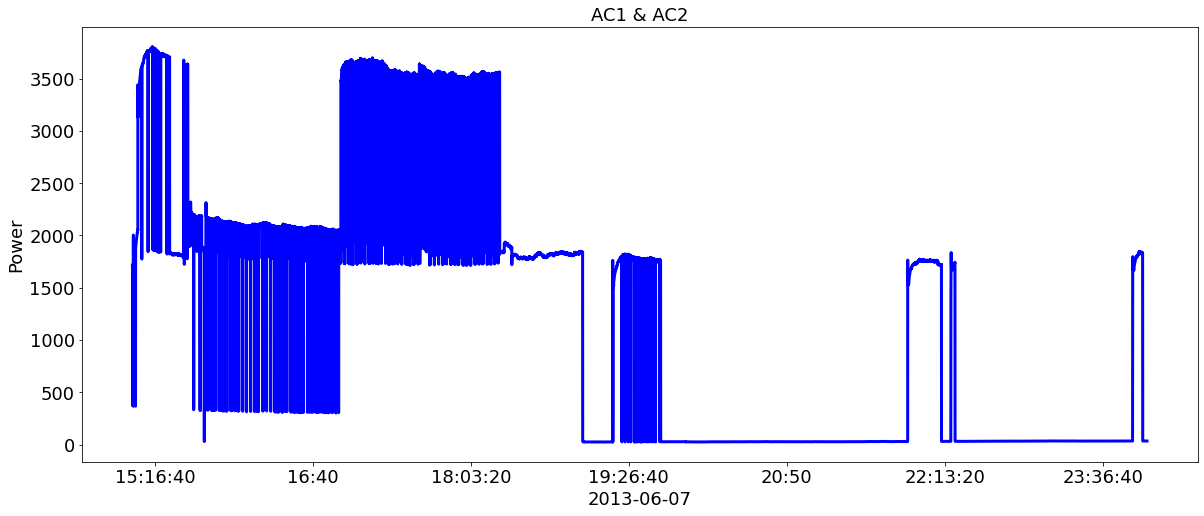

In [153]:
    df_new = df_new[(df_new['timestamp'] >=start) & (df_new['timestamp'] < end)]
    print( df_new['timestamp'])
    df_new['Time']= pd.to_datetime(df_new['timestamp']).dt.time
    df_new['timestamp']=df_new['Time']
    df_new.drop('Time',axis=1,inplace=True)
    print(df_new)
    df_new.groupby('timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('2013-06-07',fontsize=18)
    plt.title('AC1 & AC2',fontsize=18)
    plt.show()

In [25]:
df2

,timestamp,W
0,2013-06-07 15:04:51,1715.798
1,2013-06-07 15:04:52,1715.752
2,2013-06-07 15:04:53,1717.012
3,2013-06-07 15:04:54,1717.101
4,2013-06-07 15:04:57,377.866
...,...,...
640245,2013-09-18 03:10:51,1.267
640246,2013-09-18 03:10:52,1.329
640247,2013-09-18 03:10:53,1.306
640248,2013-09-18 03:10:54,1.276


0       2013-06-07 15:05:18
1       2013-06-07 15:05:19
2       2013-06-07 15:05:20
3       2013-06-07 15:05:21
4       2013-06-07 15:05:22
                ...        
12250   2013-06-07 19:43:22
12251   2013-06-07 19:43:23
12252   2013-06-07 19:43:24
12253   2013-06-07 19:43:25
12254   2013-06-07 19:43:26
Name: timestamp, Length: 12255, dtype: datetime64[ns]
      timestamp         W
0      15:05:18  1630.671
1      15:05:19  1631.803
2      15:05:20  1630.215
3      15:05:21  1630.414
4      15:05:22  1631.702
...         ...       ...
12250  19:43:22  1734.660
12251  19:43:23  1734.672
12252  19:43:24  1734.363
12253  19:43:25  1734.865
12254  19:43:26  1733.114

[12255 rows x 2 columns]


<ipython-input-26-2d93330f71ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Time']= pd.to_datetime(df3['timestamp']).dt.time
<ipython-input-26-2d93330f71ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['timestamp']=df3['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

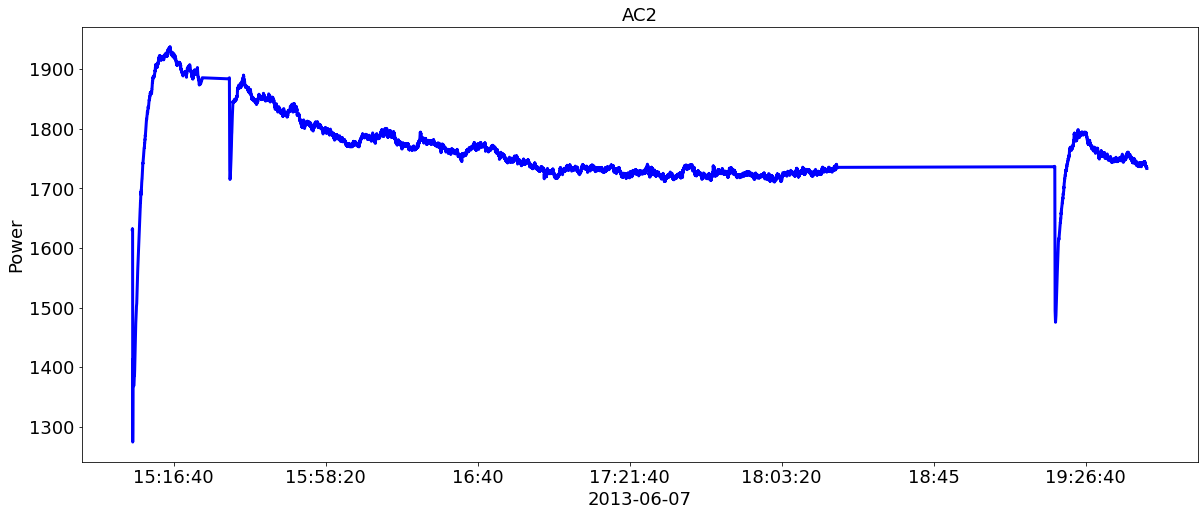

In [26]:
    df3 = df3[(df3['timestamp'] >=start) & (df3['timestamp'] < end)]
    print( df3['timestamp'])
    df3['Time']= pd.to_datetime(df3['timestamp']).dt.time
    df3['timestamp']=df3['Time']
    df3.drop('Time',axis=1,inplace=True)
    print(df3)
    df3.groupby('timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('2013-06-07',fontsize=18)
    plt.title('AC2',fontsize=18)
    plt.show()

0       2013-06-07 15:04:51
1       2013-06-07 15:04:52
2       2013-06-07 15:04:53
3       2013-06-07 15:04:54
4       2013-06-07 15:04:57
                ...        
31753   2013-06-07 23:59:55
31754   2013-06-07 23:59:56
31755   2013-06-07 23:59:57
31756   2013-06-07 23:59:58
31757   2013-06-07 23:59:59
Name: timestamp, Length: 31758, dtype: datetime64[ns]
      timestamp         W
0      15:04:51  1715.798
1      15:04:52  1715.752
2      15:04:53  1717.012
3      15:04:54  1717.101
4      15:04:57   377.866
...         ...       ...
31753  23:59:55    34.155
31754  23:59:56    34.173
31755  23:59:57    34.042
31756  23:59:58    34.107
31757  23:59:59    34.149

[31758 rows x 2 columns]


<ipython-input-27-fac6710738d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time']= pd.to_datetime(df2['timestamp']).dt.time
<ipython-input-27-fac6710738d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp']=df2['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

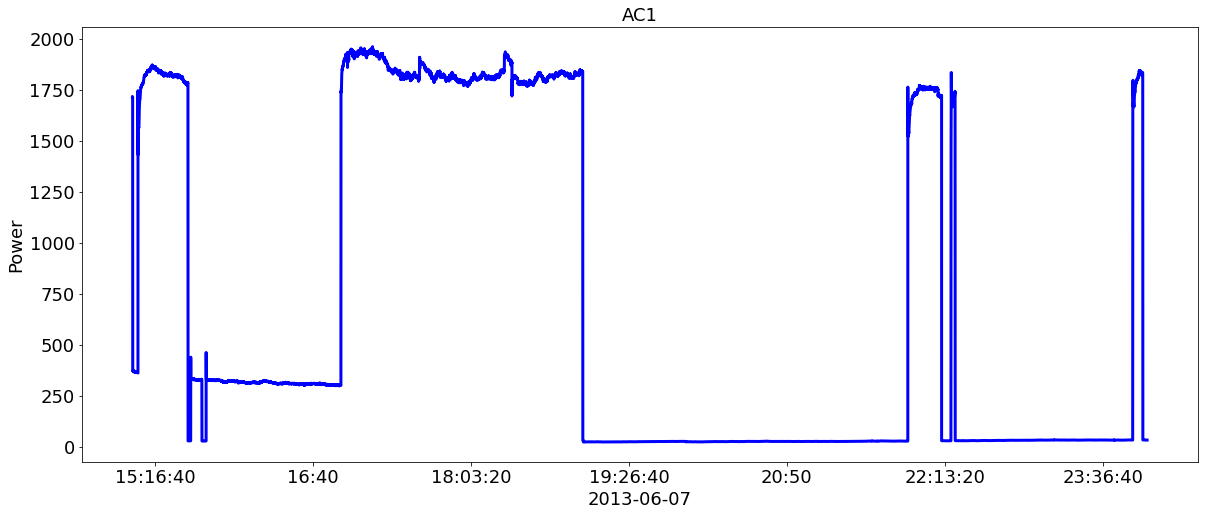

In [27]:
    df2 = df2[(df2['timestamp'] >=start) & (df2['timestamp'] < end)]
    print( df2['timestamp'])
    df2['Time']= pd.to_datetime(df2['timestamp']).dt.time
    df2['timestamp']=df2['Time']
    df2.drop('Time',axis=1,inplace=True)
    print(df2)
    df2.groupby('timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('2013-06-07',fontsize=18)
    plt.title('AC1',fontsize=18)
    plt.show()

In [205]:
df4=pd.read_csv('electricity/7.csv')
df4.head()

,timestamp,W,VAR,VA,f,V,PF,A
0,1370567081,0.221,-4.308,4.313,49.99,215.86,0.051,0.02
1,1370567082,0.190,-4.377,4.381,50.00,215.84,0.043,0.02
2,1370567083,0.206,-4.291,4.296,49.99,215.83,0.048,0.02
3,1370567084,0.139,-4.283,4.285,49.99,214.43,0.032,0.02
4,1370567085,0.239,-4.336,4.342,50.00,215.59,0.055,0.02


In [206]:
df4['TIMESTAMP']=pd.to_datetime(df4['timestamp'], unit='s')
df4['timestamp']=df4['TIMESTAMP']
df4.drop('TIMESTAMP',axis=1,inplace=True)
df4.drop(['A','PF','f','VA','VAR','V'],axis=1,inplace=True)
df4

,timestamp,W
0,2013-06-07 01:04:41,0.221
1,2013-06-07 01:04:42,0.190
2,2013-06-07 01:04:43,0.206
3,2013-06-07 01:04:44,0.139
4,2013-06-07 01:04:45,0.239
...,...,...
2550992,2013-08-05 16:31:56,26.416
2550993,2013-08-05 16:31:59,26.565
2550994,2013-08-05 16:32:00,26.433
2550995,2013-08-05 16:32:01,26.223


0       2013-06-07 01:04:41
1       2013-06-07 01:04:42
2       2013-06-07 01:04:43
3       2013-06-07 01:04:44
4       2013-06-07 01:04:45
                ...        
51552   2013-06-07 15:54:16
51553   2013-06-07 15:54:17
51554   2013-06-07 15:54:18
51555   2013-06-07 15:54:19
51556   2013-06-07 15:54:20
Name: timestamp, Length: 51557, dtype: datetime64[ns]
      timestamp       W
0      01:04:41   0.221
1      01:04:42   0.190
2      01:04:43   0.206
3      01:04:44   0.139
4      01:04:45   0.239
...         ...     ...
51552  15:54:16  24.112
51553  15:54:17   0.164
51554  15:54:18   0.207
51555  15:54:19   0.183
51556  15:54:20   0.142

[51557 rows x 2 columns]


<ipython-input-204-6cfc352d75d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Time']= pd.to_datetime(df4['timestamp']).dt.time
<ipython-input-204-6cfc352d75d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['timestamp']=df4['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

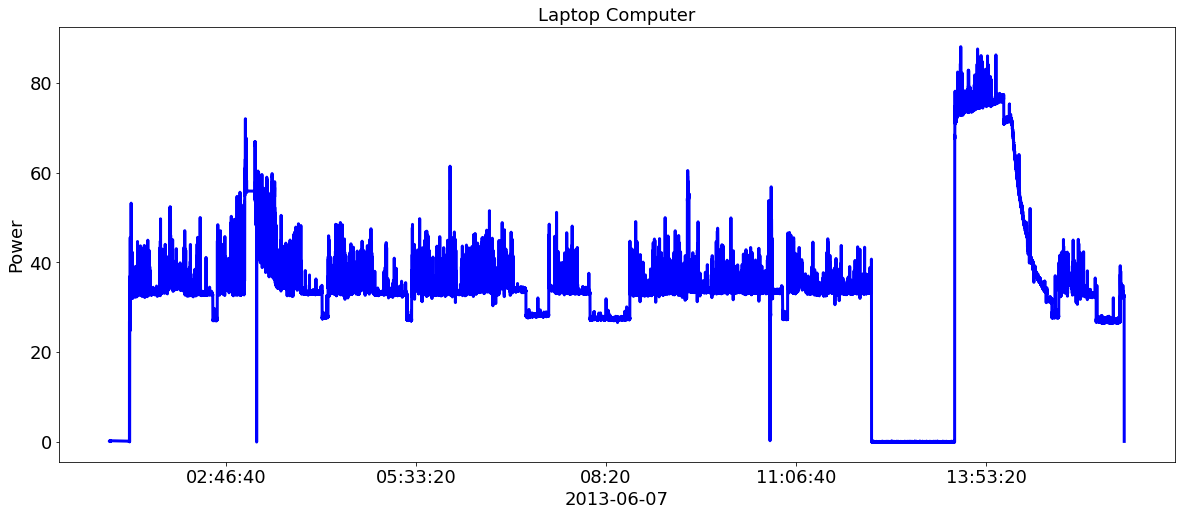

In [204]:
    df4 = df4[(df4['timestamp'] >=start) & (df4['timestamp'] < end)]
    print( df4['timestamp'])
    df4['Time']= pd.to_datetime(df4['timestamp']).dt.time
    df4['timestamp']=df4['Time']
    df4.drop('Time',axis=1,inplace=True)
    print(df4)
    df4.groupby('timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('2013-06-07',fontsize=18)
    plt.title('Laptop Computer',fontsize=18)
    plt.show()

In [232]:
df5=pd.read_csv('electricity/8.csv')
df5.head()

,timestamp,W,VAR,VA,f,V,PF,A
0,1370597866,0.307,-7.266,7.272,50.06,220.67,0.042,0.033
1,1370597867,0.378,-7.211,7.221,50.07,220.41,0.052,0.033
2,1370597868,0.269,-7.176,7.181,50.08,220.50,0.037,0.033
3,1370597869,0.367,-7.232,7.241,50.08,220.71,0.051,0.033
4,1370597870,0.367,-7.241,7.250,50.08,220.65,0.051,0.033


In [233]:
df5['TIMESTAMP']=pd.to_datetime(df5['timestamp'], unit='s')
df5['timestamp']=df5['TIMESTAMP']
df5.drop('TIMESTAMP',axis=1,inplace=True)
df5.drop(['A','PF','f','VA','VAR','V'],axis=1,inplace=True)
df5

,timestamp,W
0,2013-06-07 09:37:46,0.307
1,2013-06-07 09:37:47,0.378
2,2013-06-07 09:37:48,0.269
3,2013-06-07 09:37:49,0.367
4,2013-06-07 09:37:50,0.367
...,...,...
7129,2013-08-04 06:54:37,0.396
7130,2013-08-04 06:54:38,0.455
7131,2013-08-04 06:54:39,0.435
7132,2013-08-04 06:54:40,0.433


0     2013-06-07 09:37:46
1     2013-06-07 09:37:47
2     2013-06-07 09:37:48
3     2013-06-07 09:37:49
4     2013-06-07 09:37:50
              ...        
817   2013-06-07 09:59:37
818   2013-06-07 09:59:38
819   2013-06-07 09:59:39
820   2013-06-07 09:59:40
821   2013-06-07 09:59:41
Name: timestamp, Length: 822, dtype: datetime64[ns]


<ipython-input-45-a2dc351b2c96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Time']= pd.to_datetime(df5['timestamp']).dt.time
<ipython-input-45-a2dc351b2c96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['timestamp']=df5['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

    timestamp      W
0    09:37:46  0.307
1    09:37:47  0.378
2    09:37:48  0.269
3    09:37:49  0.367
4    09:37:50  0.367
..        ...    ...
817  09:59:37  0.335
818  09:59:38  0.400
819  09:59:39  0.461
820  09:59:40  0.352
821  09:59:41  0.426

[822 rows x 2 columns]


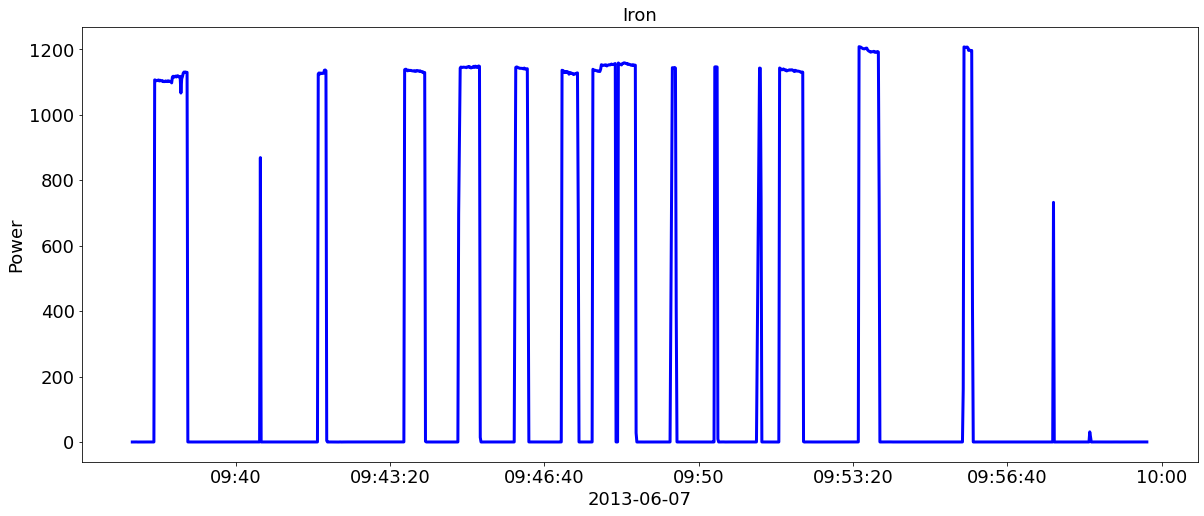

In [45]:
    df5 = df5[(df5['timestamp'] >=start) & (df5['timestamp'] < end)]
    print( df5['timestamp'])
    df5['Time']= pd.to_datetime(df5['timestamp']).dt.time
    df5['timestamp']=df5['Time']
    df5.drop('Time',axis=1,inplace=True)
    print(df5)
    df5.groupby('timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('2013-06-07',fontsize=18)
    plt.title('Iron',fontsize=18)
    plt.show()

In [234]:
df5

,timestamp,W
0,2013-06-07 09:37:46,0.307
1,2013-06-07 09:37:47,0.378
2,2013-06-07 09:37:48,0.269
3,2013-06-07 09:37:49,0.367
4,2013-06-07 09:37:50,0.367
...,...,...
7129,2013-08-04 06:54:37,0.396
7130,2013-08-04 06:54:38,0.455
7131,2013-08-04 06:54:39,0.435
7132,2013-08-04 06:54:40,0.433


In [236]:
df5['Day']=pd.to_datetime(df5['timestamp']).dt.dayofweek
df5['Hour']=pd.to_datetime(df5['timestamp']).dt.hour
df5['Minute']=pd.to_datetime(df5['timestamp']).dt.minute
df5['Seconds']=pd.to_datetime(df5['timestamp']).dt.second
df5.drop('timestamp',axis=1,inplace=True)

In [237]:
df5

,W,Day,Hour,Minute,Seconds
0,0.307,4,9,37,46
1,0.378,4,9,37,47
2,0.269,4,9,37,48
3,0.367,4,9,37,49
4,0.367,4,9,37,50
...,...,...,...,...,...
7129,0.396,6,6,54,37
7130,0.455,6,6,54,38
7131,0.435,6,6,54,39
7132,0.433,6,6,54,40


In [238]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df5)
df_scaled = pd.DataFrame(df_1,columns=df.columns)
df_scaled

,W,Day,Hour,Minute,Seconds
0,0.000235,0.666667,0.7,0.614035,0.779661
1,0.000290,0.666667,0.7,0.614035,0.796610
2,0.000205,0.666667,0.7,0.614035,0.813559
3,0.000281,0.666667,0.7,0.614035,0.830508
4,0.000281,0.666667,0.7,0.614035,0.847458
...,...,...,...,...,...
7129,0.000304,1.000000,0.4,0.912281,0.627119
7130,0.000350,1.000000,0.4,0.912281,0.644068
7131,0.000334,1.000000,0.4,0.912281,0.661017
7132,0.000333,1.000000,0.4,0.912281,0.677966


In [239]:
X=df_scaled.drop('W',axis=1)
y=df_scaled['W']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [240]:
df_scaled.isnull().sum()

W          0
Day        0
Hour       0
Minute     0
Seconds    0
dtype: int64

In [241]:
training_size=int(len(df5)*0.80)
test_size=len(df5)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:5],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df5),1:5],df_scaled.iloc[training_size:len(df5),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5707, 4) (5707,) (1427, 4) (1427,)


In [242]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [243]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1,4)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1, 50)             11000     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


In [244]:
model_history=model.fit(X_train, y_train, batch_size = 256,epochs = 10, validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
23/23 [==============================] - 11s 53ms/step - loss: 0.1785 - val_loss: 0.2325
Epoch 2/10
23/23 [==============================] - 0s 11ms/step - loss: 0.1498 - val_loss: 0.2134
Epoch 3/10
23/23 [==============================] - 0s 12ms/step - loss: 0.1393 - val_loss: 0.2036
Epoch 4/10
23/23 [==============================] - 0s 11ms/step - loss: 0.1291 - val_loss: 0.1916
Epoch 5/10
23/23 [==============================] - 0s 14ms/step - loss: 0.1220 - val_loss: 0.1870
Epoch 6/10
23/23 [==============================] - 1s 23ms/step - loss: 0.1196 - val_loss: 0.1834
Epoch 7/10
23/23 [==============================] - 0s 17ms/step - loss: 0.1181 - val_loss: 0.1837
Epoch 8/10
23/23 [==============================] - 0s 14ms/step - loss: 0.1170 - val_loss: 0.1850
Epoch 9/10
23/23 [==============================] - 0s 13ms/step - loss: 0.1162 - val_loss: 0.1871
Epoch 10/10
23/23 [==============================] - 0s 14ms/step - loss: 0.1156 - val_loss: 0.1904


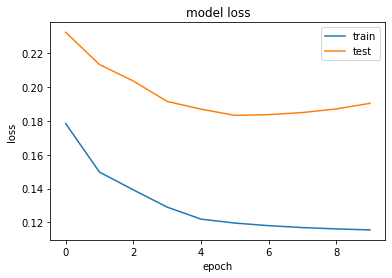

In [245]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [247]:
size = df5.shape[1]

In [248]:
yhat = model.predict(X_test)

In [249]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [250]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(1427,)

In [251]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(1427,)

In [252]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 562.783


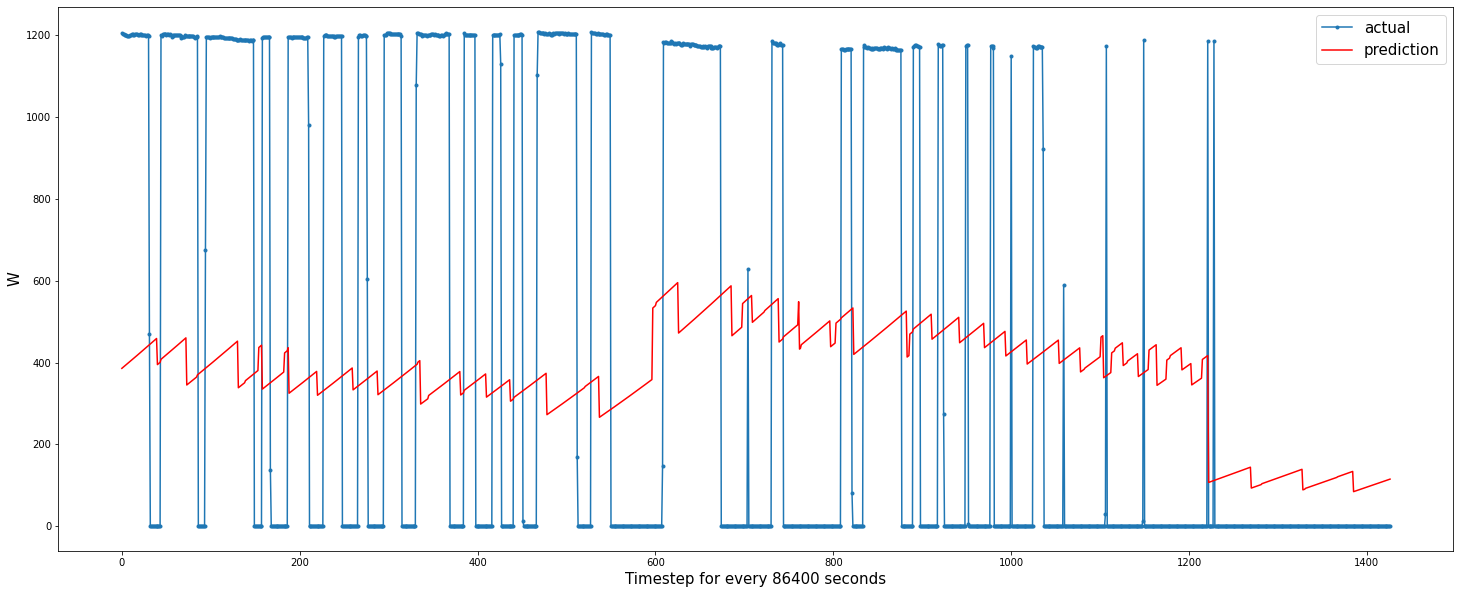

In [255]:
y=0
for i in range(1427,2854,1427):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="actual")
    plt.plot(aa, inv_yhat[y:i], 'r', label="prediction")
    y = i
    plt.ylabel(df_new.columns[0], size=15)
    plt.xlabel('Timestep for every 86400 seconds', size=15)
    plt.legend(fontsize=15)
    plt.show()

In [3]:
df1 = pd.read_csv('EV_Dataset/EV_org.csv',index_col=False)
#df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,Unnamed: 0,ID,VehicleMobility,VehicleMobility.1,DrivingConsumption,GridAvailability,GridAvailability.1,GridDemand_Immediate_full_capacity,GridDemand_Immediate_full_capacity.1,GridDemand_Immediate_balanced,GridDemand_Immediate_balanced.1,GridDemand_From_0_to_24_at_home,GridDemand_From_0_to_24_at_home.1,GridDemand_From_23_to_8_at_home,GridDemand_From_23_to_8_at_home.1
0,NaN,ID,Location,Distance_km,Consumption_kWh,ChargingStation,PowerRating_kW,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC
1,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:00:00,0.0,home,0.0,0.0,home,3.7,3.7,0.518,0.426,0.502,0.426,0.502,0.426,0.502
3,2020-01-01 00:15:00,0.0,home,0.0,0.0,home,3.7,3.7,0.537,0.426,0.504,0.426,0.504,0.426,0.504
4,2020-01-01 00:30:00,0.0,home,0.0,0.0,home,3.7,3.7,0.555,0.426,0.506,0.426,0.506,0.426,0.506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007997,2020-12-30 22:45:00,199.0,home,0.0,0.0,home,3.7,0.0,1.0,0.131,0.998,0.344,0.995,0.392,0.994
7007998,2020-12-30 23:00:00,199.0,home,0.0,0.0,home,3.7,0.0,1.0,0.131,0.999,0.344,0.996,0.392,0.996
7007999,2020-12-30 23:15:00,199.0,home,0.0,0.0,home,3.7,0.0,1.0,0.131,0.999,0.344,0.998,0.392,0.997
7008000,2020-12-30 23:30:00,199.0,home,0.0,0.0,home,3.7,0.0,1.0,0.131,1.0,0.344,0.999,0.392,0.999


In [4]:
df1.drop(['ID', 'VehicleMobility', 'VehicleMobility.1', 'DrivingConsumption', 'GridAvailability', 'GridAvailability.1'],axis=1,inplace=True)

In [5]:
df1

,Unnamed: 0,GridDemand_Immediate_full_capacity,GridDemand_Immediate_full_capacity.1,GridDemand_Immediate_balanced,GridDemand_Immediate_balanced.1,GridDemand_From_0_to_24_at_home,GridDemand_From_0_to_24_at_home.1,GridDemand_From_23_to_8_at_home,GridDemand_From_23_to_8_at_home.1
0,NaN,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC,Load_kW,SoC
1,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:00:00,3.7,0.518,0.426,0.502,0.426,0.502,0.426,0.502
3,2020-01-01 00:15:00,3.7,0.537,0.426,0.504,0.426,0.504,0.426,0.504
4,2020-01-01 00:30:00,3.7,0.555,0.426,0.506,0.426,0.506,0.426,0.506
...,...,...,...,...,...,...,...,...,...
7007997,2020-12-30 22:45:00,0.0,1.0,0.131,0.998,0.344,0.995,0.392,0.994
7007998,2020-12-30 23:00:00,0.0,1.0,0.131,0.999,0.344,0.996,0.392,0.996
7007999,2020-12-30 23:15:00,0.0,1.0,0.131,0.999,0.344,0.998,0.392,0.997
7008000,2020-12-30 23:30:00,0.0,1.0,0.131,1.0,0.344,0.999,0.392,0.999


In [6]:
df1 = df1.iloc[2:640249,0:2]

In [7]:
df1.rename(columns={'Unnamed: 0':'timestamp','GridDemand_Immediate_full_capacity':'W'},inplace=True)

In [8]:
df1

,timestamp,W
2,2020-01-01 00:00:00,3.7
3,2020-01-01 00:15:00,3.7
4,2020-01-01 00:30:00,3.7
5,2020-01-01 00:45:00,3.7
6,2020-01-01 01:00:00,3.7
...,...,...
640244,2020-04-09 04:30:00,0.0
640245,2020-04-09 04:45:00,0.0
640246,2020-04-09 05:00:00,0.0
640247,2020-04-09 05:15:00,0.0


In [14]:
df1['Day']=pd.to_datetime(df1['timestamp']).dt.dayofweek
df1['Hour']=pd.to_datetime(df1['timestamp']).dt.hour
df1['Minute']=pd.to_datetime(df1['timestamp']).dt.minute
#df1['Seconds']=pd.to_datetime(df1['date_from']).dt.second
df1.drop('timestamp',axis=1,inplace=True)

In [15]:
df1

,W,Day,Hour,Minute
2,3.7,2,0,0
3,3.7,2,0,15
4,3.7,2,0,30
5,3.7,2,0,45
6,3.7,2,1,0
...,...,...,...,...
640244,0.0,3,4,30
640245,0.0,3,4,45
640246,0.0,3,5,0
640247,0.0,3,5,15


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df1)
df_scaled = pd.DataFrame(df_1,columns=df1.columns)
df_scaled

,W,Day,Hour,Minute
0,0.024667,0.333333,0.000000,0.000000
1,0.024667,0.333333,0.000000,0.333333
2,0.024667,0.333333,0.000000,0.666667
3,0.024667,0.333333,0.000000,1.000000
4,0.024667,0.333333,0.043478,0.000000
...,...,...,...,...
640242,0.000000,0.500000,0.173913,0.666667
640243,0.000000,0.500000,0.173913,1.000000
640244,0.000000,0.500000,0.217391,0.000000
640245,0.000000,0.500000,0.217391,0.333333


In [17]:
#df_scaled.rename(columns={'Synthetic_3_6kW':'W'},inplace=True)

In [18]:
df_scaled

,W,Day,Hour,Minute
0,0.024667,0.333333,0.000000,0.000000
1,0.024667,0.333333,0.000000,0.333333
2,0.024667,0.333333,0.000000,0.666667
3,0.024667,0.333333,0.000000,1.000000
4,0.024667,0.333333,0.043478,0.000000
...,...,...,...,...
640242,0.000000,0.500000,0.173913,0.666667
640243,0.000000,0.500000,0.173913,1.000000
640244,0.000000,0.500000,0.217391,0.000000
640245,0.000000,0.500000,0.217391,0.333333


In [19]:
X=df_scaled.drop('W',axis=1)
y=df_scaled['W']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [20]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:4],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df1),1:4],df_scaled.iloc[training_size:len(df1),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(512197, 3) (512197,) (128050, 3) (128050,)


In [21]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1,3)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_history=model.fit(X_train, y_train, batch_size = 256,epochs = 10, validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
2001/2001 [==============================] - 33s 13ms/step - loss: 3.6499e-04 - val_loss: 4.7752e-04
Epoch 2/10
2001/2001 [==============================] - 24s 12ms/step - loss: 3.6385e-04 - val_loss: 4.7582e-04A: 0s - loss
Epoch 3/10
2001/2001 [==============================] - 24s 12ms/step - loss: 3.6377e-04 - val_loss: 4.7985e-04
Epoch 4/10
2001/2001 [==============================] - 24s 12ms/step - loss: 3.6357e-04 - val_loss: 4.7494e-04
Epoch 5/10
2001/2001 [==============================] - 23s 12ms/step - loss: 3.6368e-04 - val_loss: 4.7499e-04
Epoch 6/10
2001/2001 [==============================] - 24s 12ms/step - loss: 3.6368e-04 - val_loss: 4.7492e-04
Epoch 7/10
2001/2001 [==============================] - 24s 12ms/step - loss: 3.6360e-04 - val_loss: 4.7509e-04
Epoch 8/10
2001/2001 [==============================] - 24s 12ms/step - loss: 3.6358e-04 - val_loss: 4.7552e-04
Epoch 9/10
2001/2001 [==============================] - 24s 12ms/step - loss: 3.6357e-04 - v

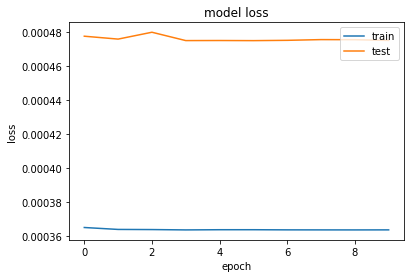

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
size = df1.shape[1]

In [26]:
yhat = model.predict(X_test)

In [27]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [28]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(128050,)

In [29]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(128050,)

In [30]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.269


In [51]:
df1

,W,Day,Hour,Minute
2,3.7,2,0,0
3,3.7,2,0,15
4,3.7,2,0,30
5,3.7,2,0,45
6,3.7,2,1,0
...,...,...,...,...
640244,0.0,3,4,30
640245,0.0,3,4,45
640246,0.0,3,5,0
640247,0.0,3,5,15


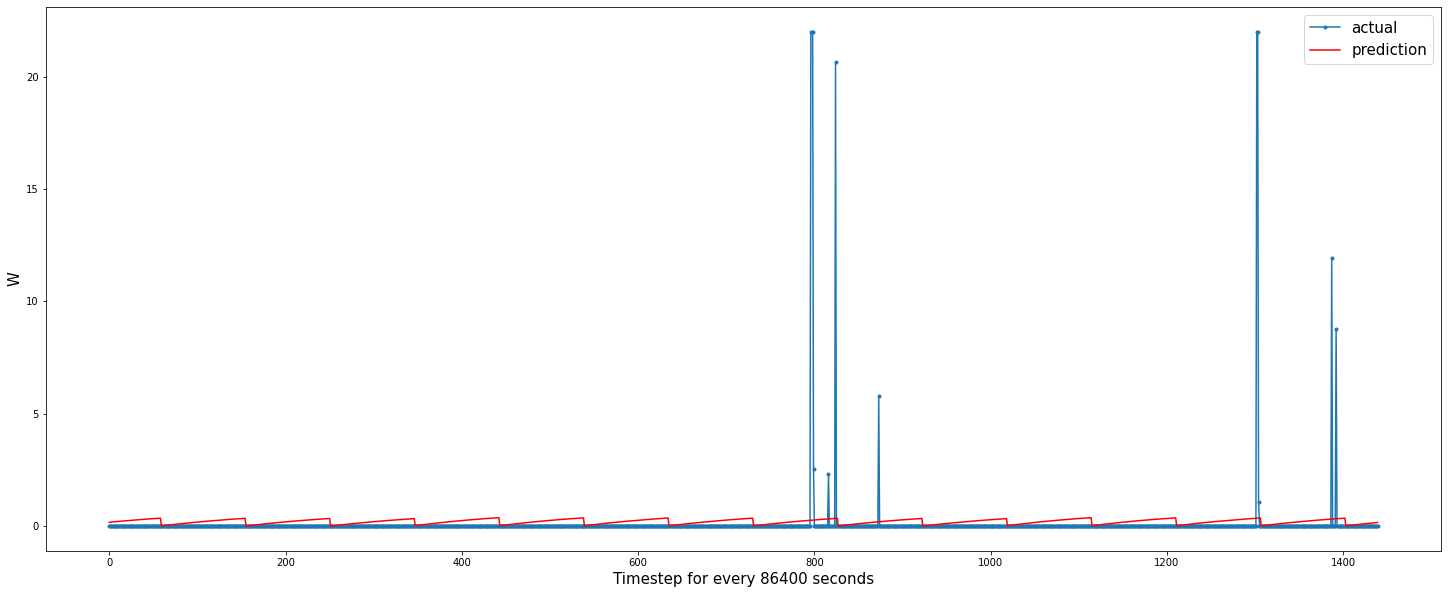

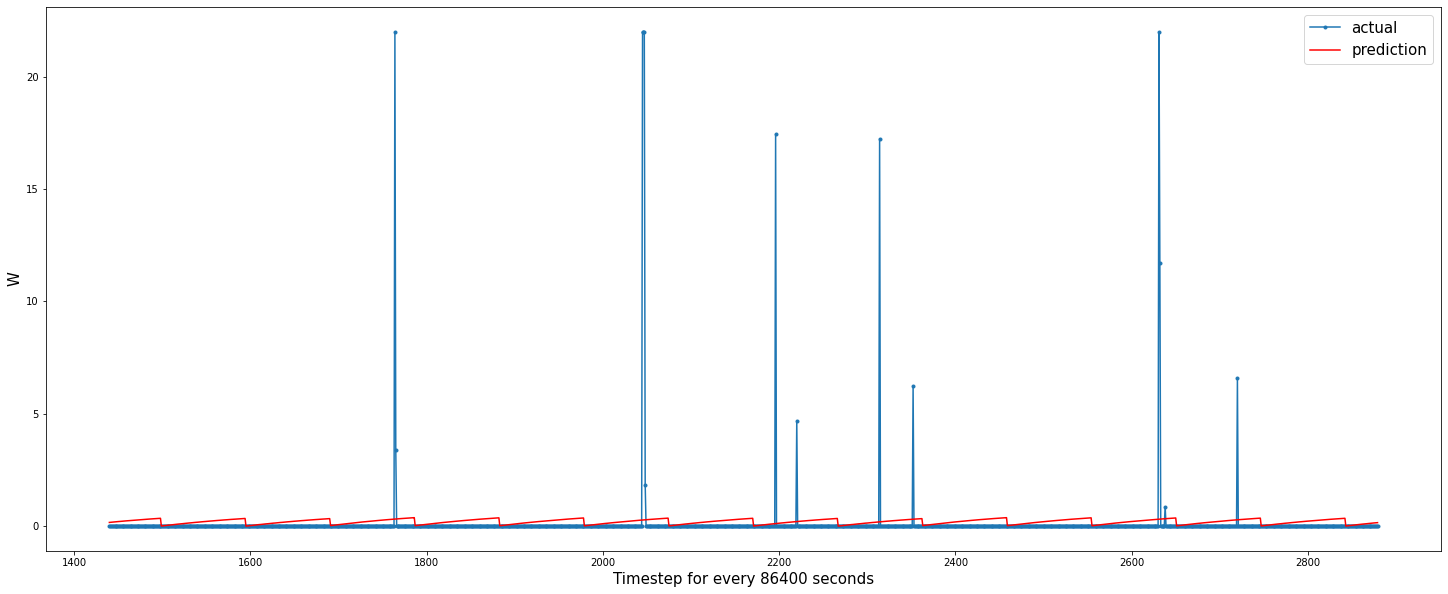

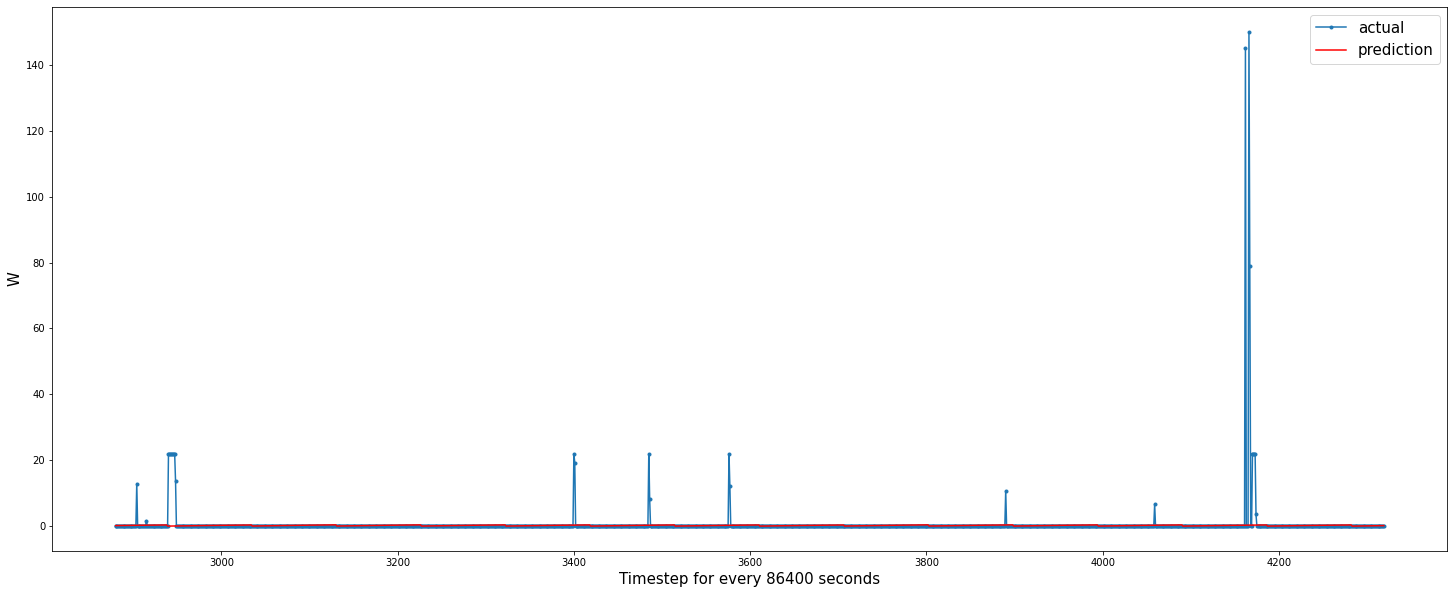

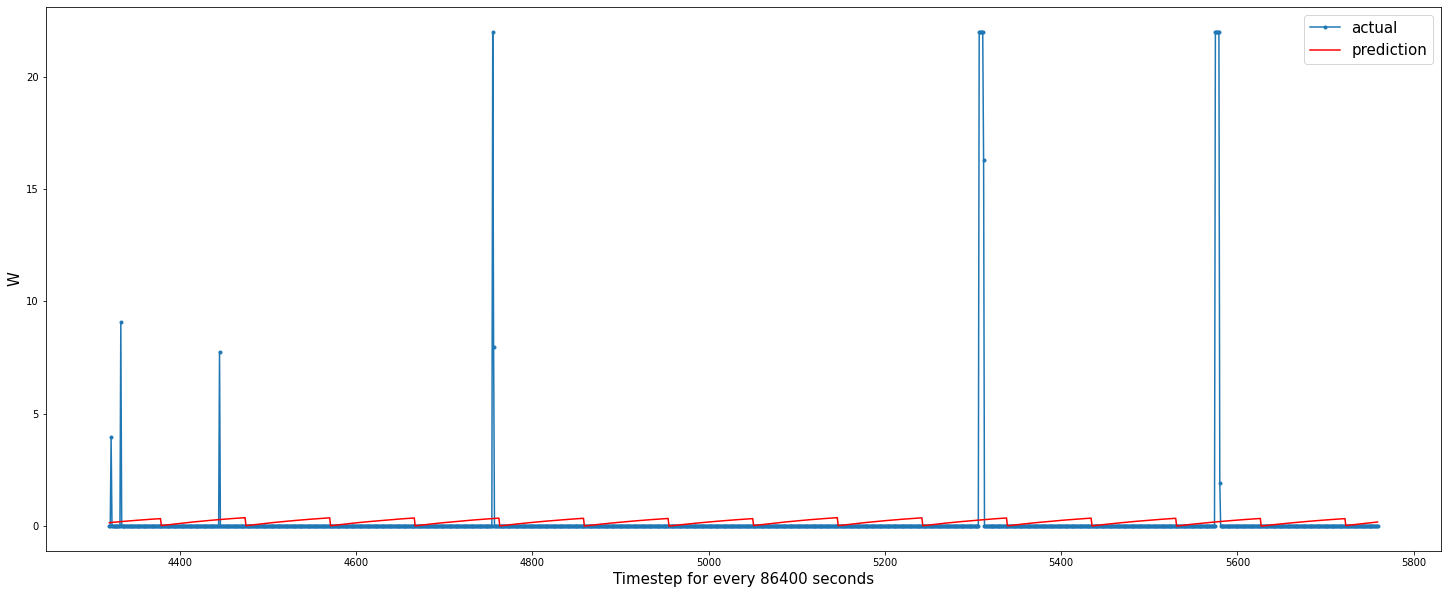

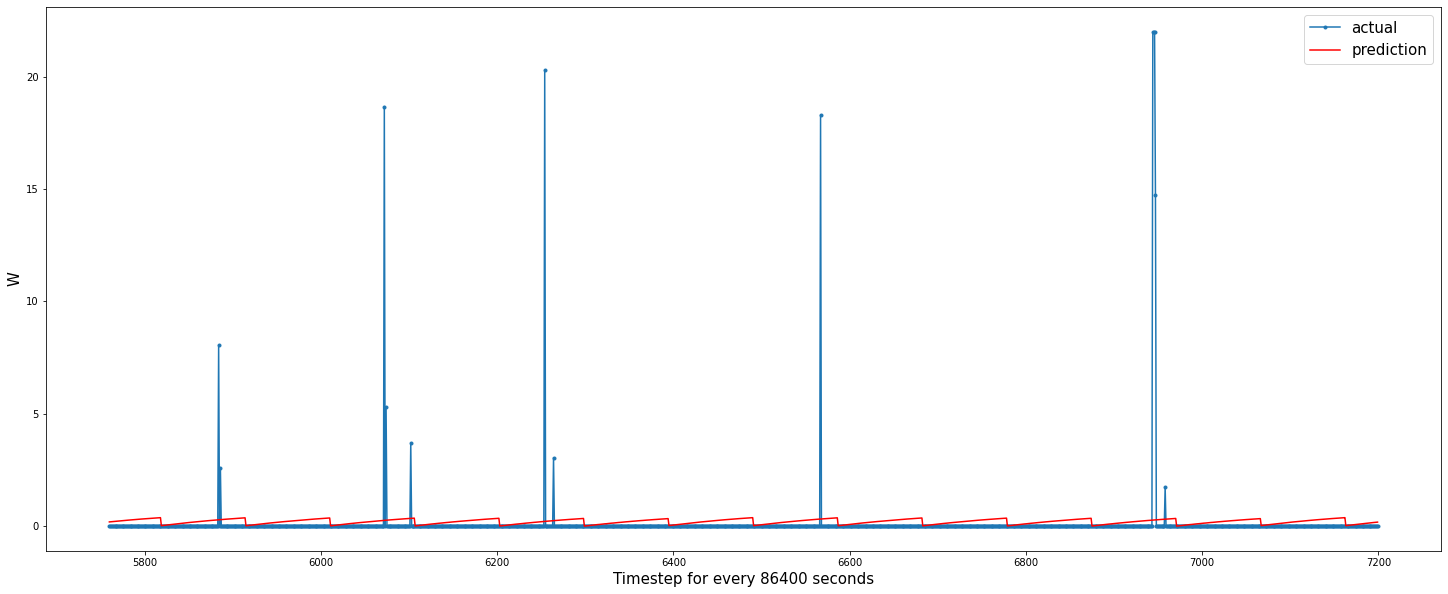

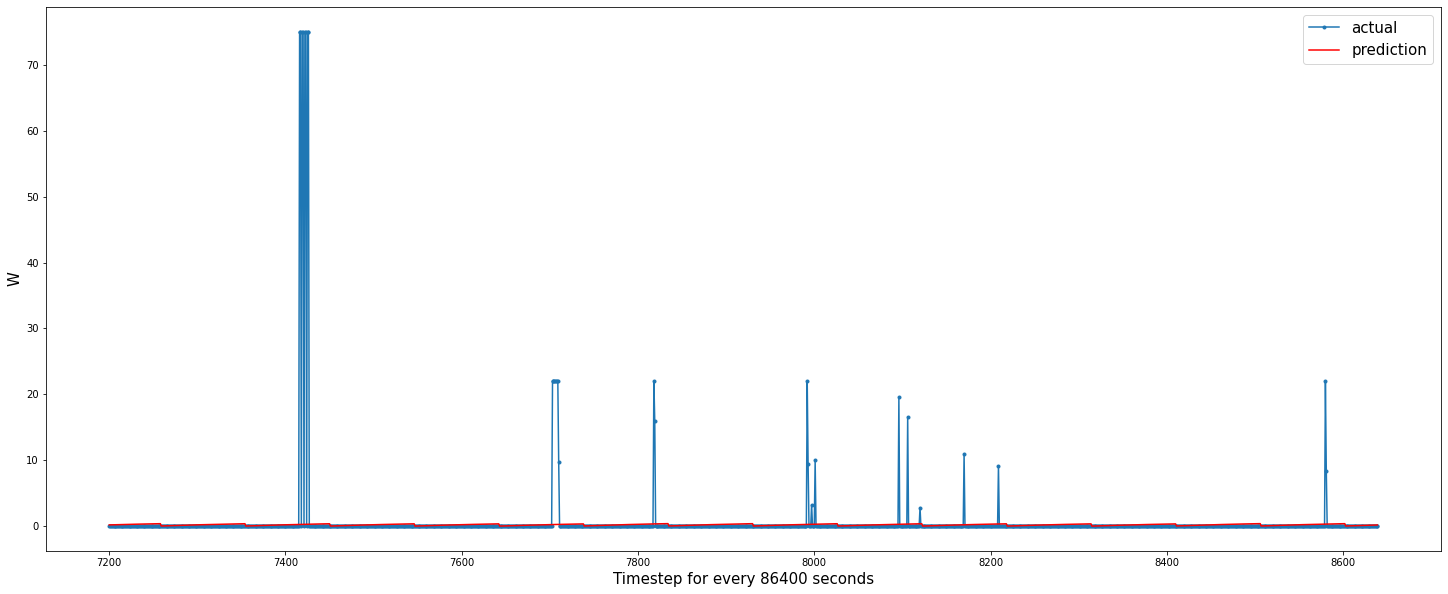

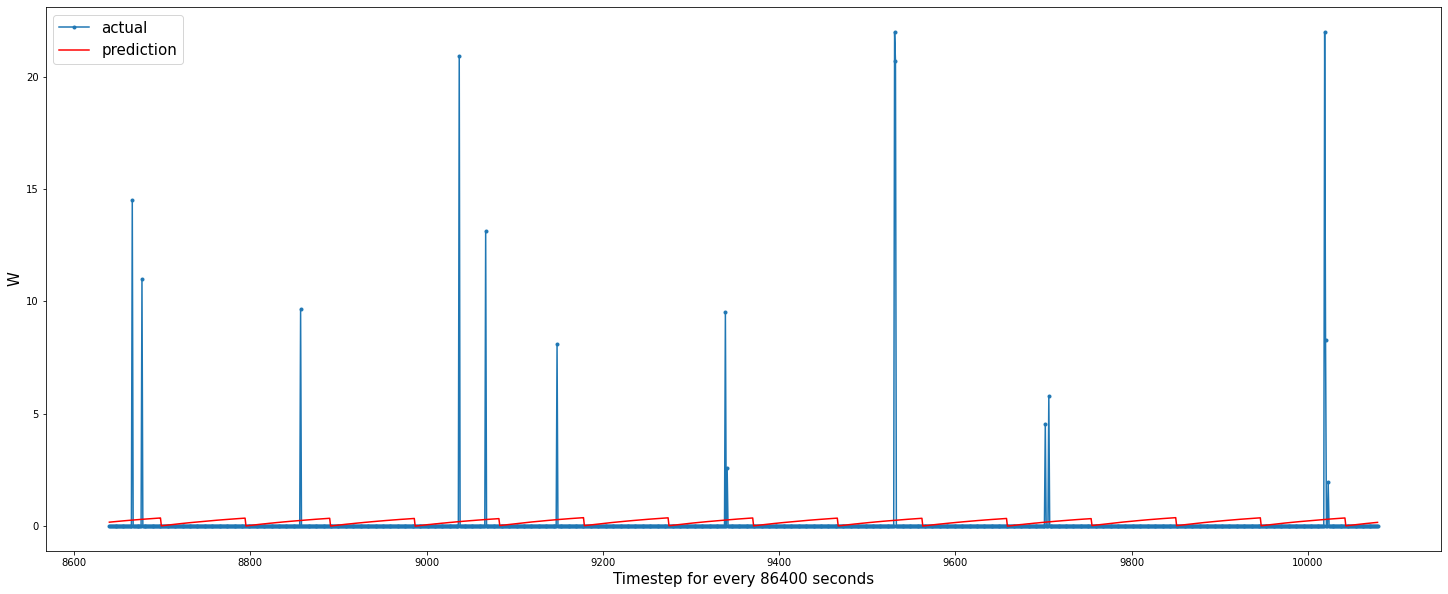

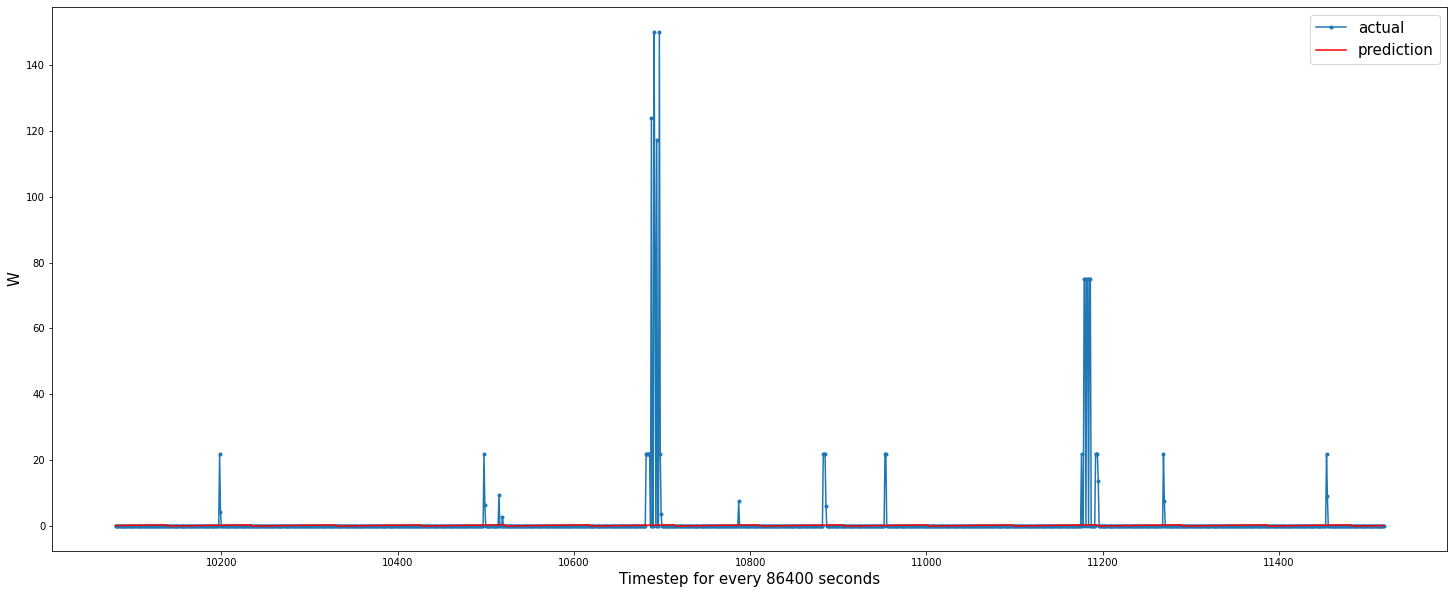

In [34]:
y=0
for i in range(1440,12805,1440):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="actual")
    plt.plot(aa, inv_yhat[y:i], 'r', label="prediction")
    y = i
    plt.ylabel(df1.columns[0], size=15)
    plt.xlabel('Timestep for every 86400 seconds', size=15)
    plt.legend(fontsize=15)
    plt.show()

In [9]:
start = pd.to_datetime(date(2020,1,1))
end = pd.to_datetime(date(2020,1,2))

In [10]:
df1['W']=pd.to_numeric(df1['W'], errors='coerce')

2         2020-01-01 00:00:00
3         2020-01-01 00:15:00
4         2020-01-01 00:30:00
5         2020-01-01 00:45:00
6         2020-01-01 01:00:00
                 ...         
630813    2020-01-01 22:45:00
630814    2020-01-01 23:00:00
630815    2020-01-01 23:15:00
630816    2020-01-01 23:30:00
630817    2020-01-01 23:45:00
Name: timestamp, Length: 1824, dtype: object


<ipython-input-11-2ca3d645b3e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time']= pd.to_datetime(df_1['timestamp']).dt.time
<ipython-input-11-2ca3d645b3e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['timestamp']=df_1['Time']
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

       timestamp    W
2       00:00:00  3.7
3       00:15:00  3.7
4       00:30:00  3.7
5       00:45:00  3.7
6       01:00:00  3.7
...          ...  ...
630813  22:45:00  0.0
630814  23:00:00  0.0
630815  23:15:00  0.0
630816  23:30:00  0.0
630817  23:45:00  0.0

[1824 rows x 2 columns]


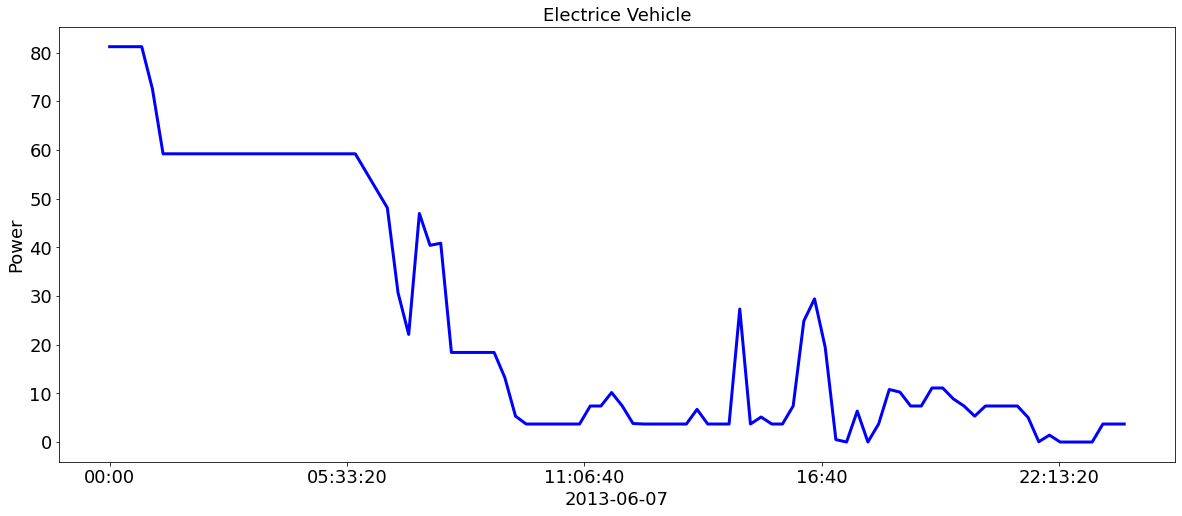

In [11]:
    df_1 = df1[(df1['timestamp'] >='2020-01-01 00:00:00') & (df1['timestamp'] < '2020-01-02 00:00:00')]
    print( df_1['timestamp'])
    df_1['Time']= pd.to_datetime(df_1['timestamp']).dt.time
    df_1['timestamp']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('timestamp')['W'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('2013-06-07',fontsize=18)
    plt.title('Electrice Vehicle',fontsize=18)
    plt.show()

In [12]:
df1

,timestamp,W
2,2020-01-01 00:00:00,3.7
3,2020-01-01 00:15:00,3.7
4,2020-01-01 00:30:00,3.7
5,2020-01-01 00:45:00,3.7
6,2020-01-01 01:00:00,3.7
...,...,...
640244,2020-04-09 04:30:00,0.0
640245,2020-04-09 04:45:00,0.0
640246,2020-04-09 05:00:00,0.0
640247,2020-04-09 05:15:00,0.0


In [137]:
df=pd.read_csv('electricity/6.csv')
df.head()

,timestamp,W,VAR,VA,f,V,PF,A
0,1370827920,140.439,-29.054,143.413,49.99,189.08,0.979,0.758
1,1370827921,144.859,-29.332,147.799,50.01,189.24,0.980,0.781
2,1370827922,146.755,-29.215,149.634,49.99,189.02,0.981,0.792
3,1370827923,145.091,-29.237,148.007,50.00,189.21,0.980,0.782
4,1370827924,145.709,-29.457,148.657,49.99,189.09,0.980,0.786


In [138]:
df['TIMESTAMP']=pd.to_datetime(df['timestamp'], unit='s')
df['timestamp']=df['TIMESTAMP']
df.drop('TIMESTAMP',axis=1,inplace=True)

In [139]:
df.drop(['A','PF','f','VA','VAR','V'],axis=1,inplace=True)

In [140]:
df['W']=pd.to_numeric(df['W'], errors='coerce')

In [141]:
from datetime import date, timedelta

In [142]:
start = pd.to_datetime(date(2013,5,30))
end = pd.to_datetime(date(2013,5,31))

In [143]:
df

,timestamp,W
0,2013-06-10 01:32:00,140.439
1,2013-06-10 01:32:01,144.859
2,2013-06-10 01:32:02,146.755
3,2013-06-10 01:32:03,145.091
4,2013-06-10 01:32:04,145.709
...,...,...
23735,2013-08-04 06:59:55,208.827
23736,2013-08-04 06:59:56,212.049
23737,2013-08-04 06:59:57,201.775
23738,2013-08-04 06:59:58,211.515


In [144]:
df['Day']=pd.to_datetime(df['timestamp']).dt.dayofweek
df['Hour']=pd.to_datetime(df['timestamp']).dt.hour
df['Minute']=pd.to_datetime(df['timestamp']).dt.minute
df['Seconds']=pd.to_datetime(df['timestamp']).dt.second
df.drop('timestamp',axis=1,inplace=True)

In [145]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1=scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_1,columns=df.columns)
df_scaled

,W,Day,Hour,Minute,Seconds
0,0.244639,0.0,0.083333,0.542373,0.000000
1,0.252339,0.0,0.083333,0.542373,0.016949
2,0.255641,0.0,0.083333,0.542373,0.033898
3,0.252743,0.0,0.083333,0.542373,0.050847
4,0.253819,0.0,0.083333,0.542373,0.067797
...,...,...,...,...,...
23735,0.363770,1.0,0.500000,1.000000,0.932203
23736,0.369383,1.0,0.500000,1.000000,0.949153
23737,0.351485,1.0,0.500000,1.000000,0.966102
23738,0.368452,1.0,0.500000,1.000000,0.983051


In [146]:
X=df_scaled.drop('W',axis=1)
y=df_scaled['W']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [147]:
df_scaled.isnull().sum()

W          0
Day        0
Hour       0
Minute     0
Seconds    0
dtype: int64

In [148]:
training_size=int(len(df)*0.80)
test_size=len(df)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:5],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df),1:5],df_scaled.iloc[training_size:len(df),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(18992, 4) (18992,) (4748, 4) (4748,)


In [149]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
# units is output and kernel_initializer is weight intialization technique
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [150]:
model_history=classifier.fit(X_train, y_train,validation_split=0.2, batch_size = 256,epochs = 10)

Epoch 1/10
60/60 [==============================] - 7s 19ms/step - loss: 0.0342 - val_loss: 0.0127
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0113
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0111
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0054 - val_loss: 0.0112
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0111
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0111
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0111
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0112
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0114
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0112


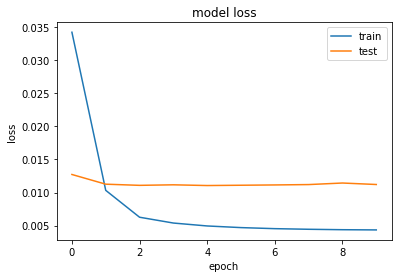

In [151]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [152]:
yhat = classifier.predict(X_test)

In [153]:
df

,W,Day,Hour,Minute,Seconds
0,140.439,0,1,32,0
1,144.859,0,1,32,1
2,146.755,0,1,32,2
3,145.091,0,1,32,3
4,145.709,0,1,32,4
...,...,...,...,...,...
23735,208.827,6,6,59,55
23736,212.049,6,6,59,56
23737,201.775,6,6,59,57
23738,211.515,6,6,59,58


In [154]:
size=df.shape[1]

In [155]:
inv_yhat = np.concatenate((yhat, X_test[:,1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(4748,)

In [156]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(4748,)

In [157]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 43.041


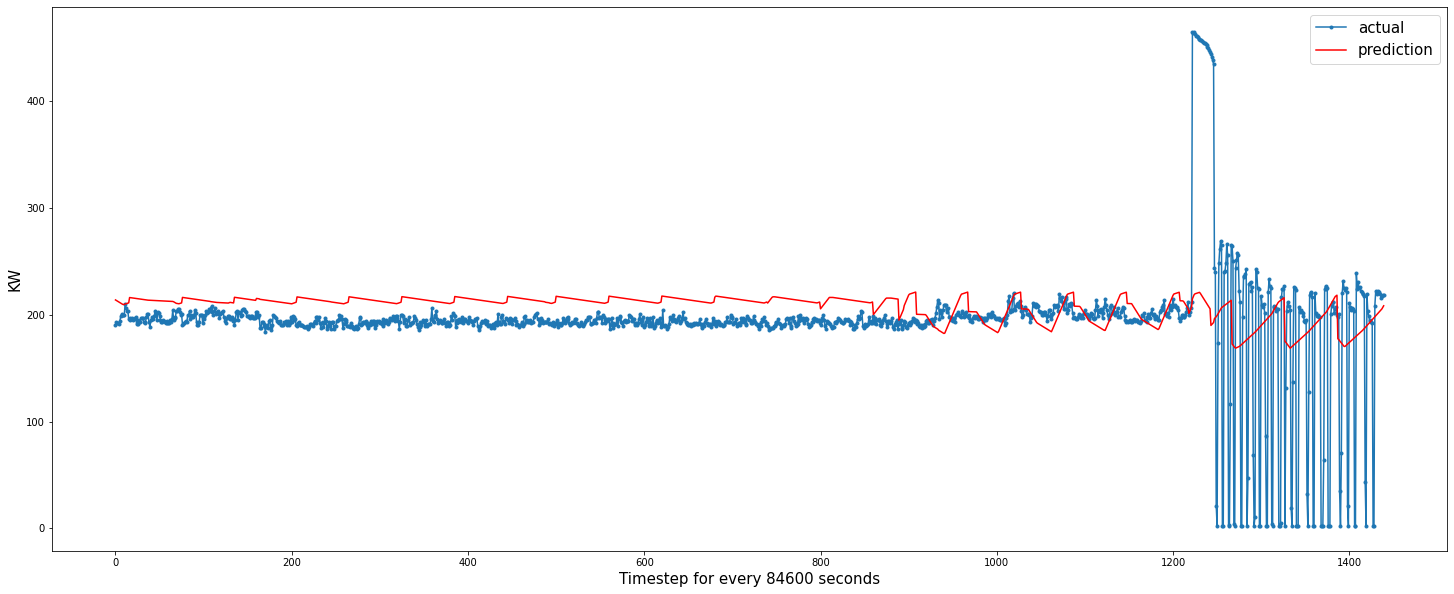

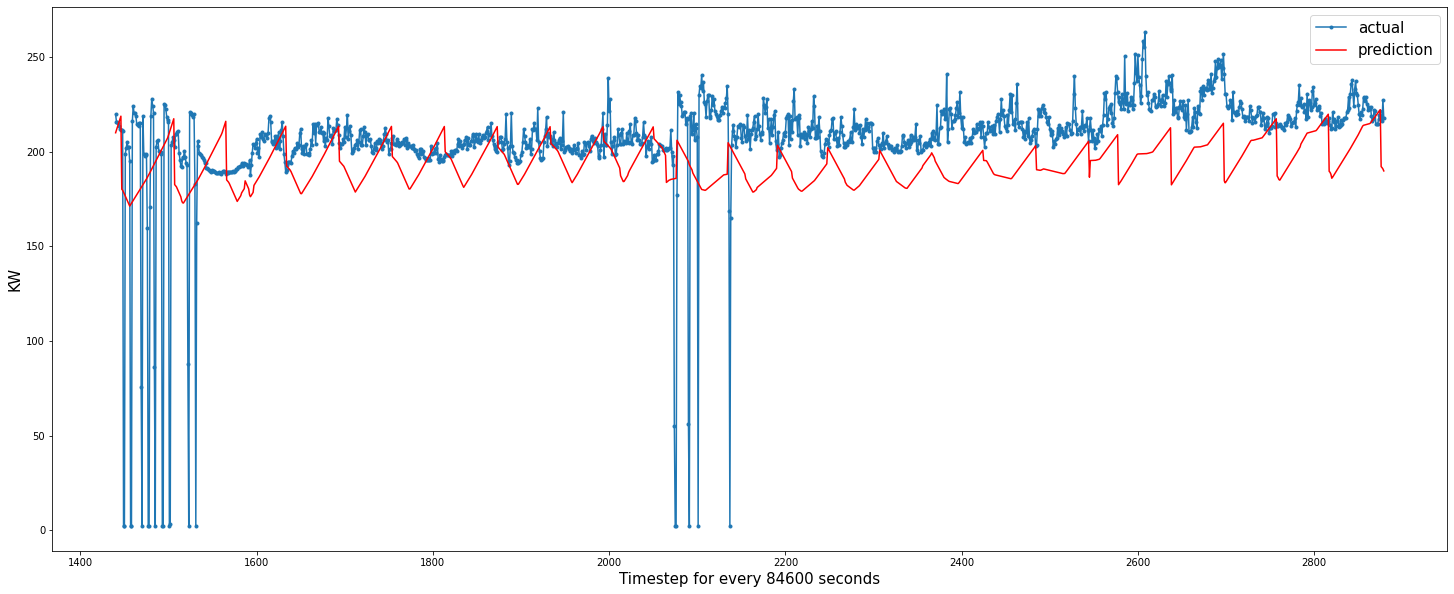

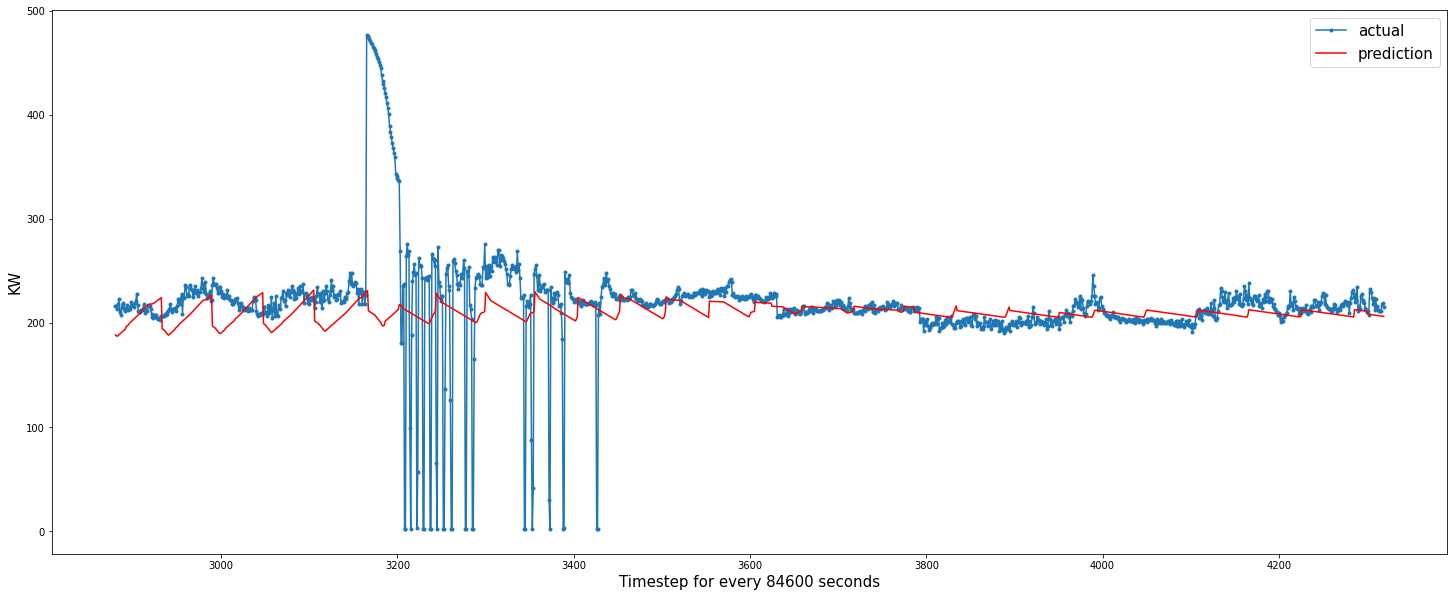

In [159]:
y=0
for i in range(1440,4748,1440):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="actual")
    plt.plot(aa, inv_yhat[y:i], 'r', label="prediction")
    y = i
    plt.ylabel('KW', size=15)
    plt.xlabel('Timestep for every 84600 seconds', size=15)
    plt.legend(fontsize=15)
    plt.show()